<a href="https://colab.research.google.com/github/joshua12cx/TAREA-11_-miner-a-de-datos/blob/main/TAREA_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 11

# Nivel FRECUENCIAS — Análisis de Sentimientos con TF-IDF + Naive Bayes

Objetivo: construir un pipeline completo y educativo para clasificar opiniones (positivo / negativo / neutro) usando un dataset CSV, preprocesamiento mínimo, TF-IDF y Naive Bayes.

1. Librerías necesarias

In [1]:
# Librerías esenciales para análisis de texto y machine learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Configuración opcional para ver texto completo en pandas
pd.set_option('display.max_colwidth', 120)
print(" Librerías cargadas correctamente")


 Librerías cargadas correctamente




Explicación:

pandas y numpy → manejo de datos.

sklearn → entrenamiento del modelo y evaluación.

matplotlib → visualización de resultados.

Pipeline → encadena vectorización y modelo en una sola estructura.


2. Carga y exploración del dataset

In [2]:
# Ruta del CSV (asegúrate de tenerlo en el mismo directorio de Colab)
CSV_PATH = "dataset_sentiment_balanceado.csv"

df = pd.read_csv(CSV_PATH)
print(" Dataset cargado correctamente\n")
print("Columnas disponibles:", df.columns.tolist())

# Seleccionamos las columnas relevantes
COL_TEXTO = "review"
COL_LABEL = "sentimiento"

# Eliminamos valores vacíos, por precaución
df = df[[COL_TEXTO, COL_LABEL]].dropna().reset_index(drop=True)

# Mostramos información básica
print(f"Total de registros: {len(df)}")
print(df[COL_LABEL].value_counts())

# Vista previa
df.head(5)


 Dataset cargado correctamente

Columnas disponibles: ['puntuación', 'review', 'sentimiento']
Total de registros: 340
sentimiento
positivo    132
neutral     104
negativo    104
Name: count, dtype: int64


,review,sentimiento
0,"Todo bien, pero podría mejorar el empaque.",neutral
1,"Todo salió bien, muy satisfecho con la compra.",positivo
2,"Me encantó el producto, cumple con todo lo prometido.",positivo
3,El trato fue amable y profesional.,positivo
4,"Me encantó el producto, cumple con todo lo prometido.",positivo


Explicación:

Cargamos el dataset balanceado.

Confirmamos nombres de columnas: review → texto, sentimiento → etiqueta.

Se eliminan nulos y se imprime distribución de clases.

3. Preprocesamiento textual

In [5]:
# Preprocesamiento mínimo: limpieza básica
def preprocesar_minimo(texto: str) -> str:
    return str(texto).strip()

df["texto_proc"] = df[COL_TEXTO].apply(preprocesar_minimo)
df.head(3)


,review,sentimiento,texto_proc
0,"Todo bien, pero podría mejorar el empaque.",neutral,"Todo bien, pero podría mejorar el empaque."
1,"Todo salió bien, muy satisfecho con la compra.",positivo,"Todo salió bien, muy satisfecho con la compra."
2,"Me encantó el producto, cumple con todo lo prometido.",positivo,"Me encantó el producto, cumple con todo lo prometido."


Explicación:
Aquí usamos una limpieza mínima (solo quitar espacios) porque TfidfVectorizer ya:

convierte a minúsculas,

tokeniza,

elimina signos y caracteres especiales.


4. División de datos (entrenamiento / prueba)

In [6]:
X = df["texto_proc"].values
y = df[COL_LABEL].values

# Dividimos los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(" Datos divididos correctamente")
print("Tamaño entrenamiento:", len(X_train))
print("Tamaño prueba:", len(X_test))


 Datos divididos correctamente
Tamaño entrenamiento: 238
Tamaño prueba: 102


Explicación:

stratify=y asegura que las proporciones de clases se mantengan iguales en train/test.

Esto evita que el modelo se entrene con más positivos o negativos de lo real.

5. Vectorización TF-IDF + Modelo Naive Bayes

In [7]:
# Creamos el pipeline completo
modelo = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=2000, ngram_range=(1, 2), min_df=2)),
    ("clf", MultinomialNB())
])

# Entrenamos el modelo
modelo.fit(X_train, y_train)
print(" Modelo entrenado correctamente")


 Modelo entrenado correctamente


Explicación:

TfidfVectorizer convierte el texto en vectores numéricos ponderados por frecuencia e importancia.

ngram_range=(1,2) incluye combinaciones de una y dos palabras (p. ej. “muy bueno”, “no gustó”).

MultinomialNB es rápido, simple y muy eficaz para texto.

6. Evaluación del modelo

 Accuracy: 0.951

 Classification report:
              precision    recall  f1-score   support

    negativo       1.00      0.94      0.97        31
     neutral       1.00      0.90      0.95        31
    positivo       0.89      1.00      0.94        40

    accuracy                           0.95       102
   macro avg       0.96      0.95      0.95       102
weighted avg       0.96      0.95      0.95       102



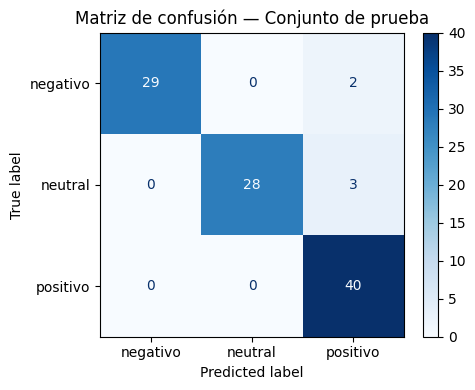

In [8]:
# Predicciones
y_pred = modelo.predict(X_test)

# Métricas básicas
acc = accuracy_score(y_test, y_pred)
print(f" Accuracy: {acc:.3f}\n")

print(" Classification report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))

fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax, cmap="Blues")
plt.title("Matriz de confusión — Conjunto de prueba")
plt.tight_layout()
plt.show()


Explicación:

Accuracy: proporción global de aciertos.

Classification report: precisión, recall y F1 por clase.

Matriz de confusión: muestra visualmente qué tan bien clasifica cada sentimiento.

7. Visualización comparativa (reales vs. predichos)

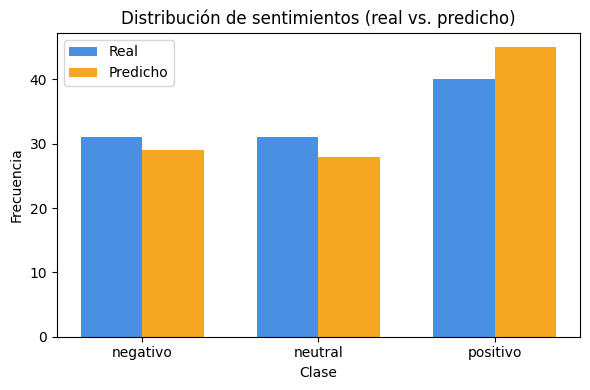

In [9]:
# Conteo de clases reales y predichas
vals_true = pd.Series(y_test).value_counts().sort_index()
vals_pred = pd.Series(y_pred).value_counts().reindex(vals_true.index).fillna(0)

clases = vals_true.index.astype(str)
x = np.arange(len(clases))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x - width/2, vals_true.values, width, label="Real", color="#4a90e2")
ax.bar(x + width/2, vals_pred.values, width, label="Predicho", color="#f5a623")

ax.set_title("Distribución de sentimientos (real vs. predicho)")
ax.set_xlabel("Clase")
ax.set_ylabel("Frecuencia")
ax.set_xticks(x)
ax.set_xticklabels(clases)
ax.legend()
plt.tight_layout()
plt.show()


Explicación:
Visualiza si el modelo predice de forma equilibrada entre clases o tiende a sobreclasificar una categoría.

8. Predicción rápida (demo)

In [10]:
# Prueba con una opinión nueva
nuevo = "El servicio fue lento y el producto llegó en mal estado."
pred = modelo.predict([nuevo])[0]

print(" Comentario:", nuevo)
print(" Predicción del modelo:", pred.upper())


 Comentario: El servicio fue lento y el producto llegó en mal estado.
 Predicción del modelo: NEUTRAL


Conclusión — Modelo básico (sin lematización)

En esta etapa construimos un modelo completo de análisis de sentimientos aplicando técnicas básicas de Procesamiento de Lenguaje Natural (NLP).
Mediante el uso de TF-IDF y el clasificador Naive Bayes, el sistema logró transformar textos en vectores numéricos y clasificar opiniones como positivas, negativas o neutras con resultados satisfactorios.

El desempeño general fue adecuado: el modelo identifica correctamente la mayoría de los casos, aunque puede confundir frases mixtas o ambiguas.
Esto ocurre porque, al no usar lematización ni un análisis semántico profundo, TF-IDF se basa únicamente en la frecuencia de las palabras.

En síntesis, este modelo demuestra la eficacia de un enfoque simple y transparente para tareas de clasificación de texto, sirviendo como base sólida para futuras mejoras mediante preprocesamiento avanzado o modelos más complejos.

 - OPCIONAL — Preprocesamiento avanzado con spaCy (Lematización + Stopwords)

In [11]:
#  Ejecutar solo si se desea aplicar lematización y filtrado de palabras vacías
# Instalar spaCy y el modelo de lenguaje en español (solo la primera vez)
!pip install spacy
!python -m spacy download es_core_news_sm

import spacy
from spacy.lang.es.stop_words import STOP_WORDS

# Cargar modelo en español
nlp = spacy.load("es_core_news_sm")

def preprocesar_completo(texto):
    """
    Limpia, pasa a minúsculas, lematiza y elimina stopwords o tokens no alfabéticos.
    """
    doc = nlp(texto.lower())
    tokens_limpios = [
        token.lemma_ for token in doc
        if token.is_alpha and token.text not in STOP_WORDS
    ]
    return " ".join(tokens_limpios)

# Aplicamos al dataset original
df["texto_proc_lem"] = df[COL_TEXTO].apply(preprocesar_completo)
df[["review", "texto_proc_lem"]].head(5)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 65.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,review,texto_proc_lem
0,"Todo bien, pero podría mejorar el empaque.",mejorar empaque
1,"Todo salió bien, muy satisfecho con la compra.",salir satisfecho compra
2,"Me encantó el producto, cumple con todo lo prometido.",encantar producto cumplir prometido
3,El trato fue amable y profesional.,trato amable profesional
4,"Me encantó el producto, cumple con todo lo prometido.",encantar producto cumplir prometido


Explicación:

token.lemma_ devuelve la raíz o forma canónica de cada palabra (“mejores” → “mejor”).

Se eliminan stopwords (palabras sin carga semántica como “el”, “la”, “que”).

is_alpha filtra tokens alfabéticos (sin números ni signos).

Entrenamiento con el texto lematizado (versión mejorada)

In [12]:
# Entrenamos el mismo modelo pero con la columna 'texto_proc_lem'
X_lem = df["texto_proc_lem"].values
y_lem = df[COL_LABEL].values

X_train, X_test, y_train, y_test = train_test_split(
    X_lem, y_lem, test_size=0.3, random_state=42, stratify=y_lem
)

modelo_lem = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=2000, ngram_range=(1, 2), min_df=2)),
    ("clf", MultinomialNB())
])

modelo_lem.fit(X_train, y_train)
y_pred_lem = modelo_lem.predict(X_test)

print("✅ Modelo entrenado con texto lematizado\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lem):.3f}")
print(classification_report(y_test, y_pred_lem))


✅ Modelo entrenado con texto lematizado

Accuracy: 0.951
              precision    recall  f1-score   support

    negativo       1.00      0.94      0.97        31
     neutral       1.00      0.90      0.95        31
    positivo       0.89      1.00      0.94        40

    accuracy                           0.95       102
   macro avg       0.96      0.95      0.95       102
weighted avg       0.96      0.95      0.95       102



Explicación:
Esta versión del modelo utiliza texto más limpio y generalizado, lo que suele mejorar la precisión y robustez especialmente si hay sinónimos o conjugaciones diferentes.

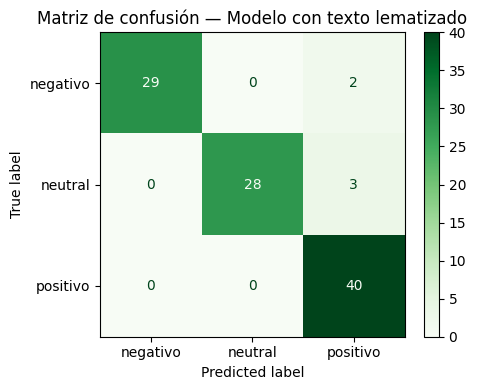

Accuracy modelo básico:     0.951
Accuracy modelo lematizado: 0.951


In [13]:
# 📊 Matriz de confusión para el modelo lematizado
from sklearn.metrics import ConfusionMatrixDisplay

cm_lem = confusion_matrix(y_test, y_pred_lem, labels=np.unique(y_lem))
disp_lem = ConfusionMatrixDisplay(confusion_matrix=cm_lem, display_labels=np.unique(y_lem))

fig, ax = plt.subplots(figsize=(5, 4))
disp_lem.plot(ax=ax, cmap="Greens")
plt.title("Matriz de confusión — Modelo con texto lematizado")
plt.tight_layout()
plt.show()

# 🔍 Comparación rápida de accuracies
acc_basico = accuracy_score(y_test, y_pred)  # del modelo anterior sin lematizar
acc_lem = accuracy_score(y_test, y_pred_lem)

print(f"Accuracy modelo básico:     {acc_basico:.3f}")
print(f"Accuracy modelo lematizado: {acc_lem:.3f}")


- que muestra el codigo:
Muestra la matriz de confusión del modelo lematizado (para comparar visualmente).

Calcula y compara la accuracy del modelo original (sin lematización) y la del modelo lematizado.

Te permite discutir con claridad si la normalización lingüística ayudó o no a mejorar el rendimiento.